# <h1><center>GEOPANDAS KÜTÜPHANESİNE GİRİŞ</center></h1>

Bu ünitede, Geopandas kütüphanesini kullanarak coğrafi verinin Python ortamında yüklenmesinin ve işlenmesinin temellerini irdeleyeceğiz. Geopandas kütüphanesi, NumPy ve Pandas kütüphaneleri üzerine inşa edilmiştir. Geopandas kütüphanesinde kullanılan veri yapıları, GeoDataFrame ve GeoSeries şeklinde ikiye ayrılmaktadır. Geopandas kütüphanesi, coğrafi verinin okunması ve düzenlenmesinin yanı sıra, temel coğrafi analiz işlemlerinde de yardımımıza yetişmektedir. Geometrik operasyonlar, Shapely kütüphanesi ile birlikte gerçekleştirilmektedir.

![figure](https://geopandas.readthedocs.io/en/latest/_images/geopandas_logo.png)



## 1 - Coğrafi Verinin Okunması

Vektör veri farklı formatlarda hazırlanmaktadır (Shapefile, Geopackage, GeoJSON vb.). Geopandas kütüphanesi ile çoğu coğrafi veri formatını Python ortamında okuyabilmek ve işlemek oldukça kolaydır. Aşağıdaki kod yapısını, coğrafi veri okumak için kullanabiliriz:

```
read_file(dosya konumu)

```

Geopandas kütüphanesi `import geopandas` komutu ile yüklenir. `as gpd` komutu ile kısaltmayı tercih ediyoruz. 

In [1]:
import geopandas as gpd

Çalışma ortamımızda saklı olan ve tüm dünya ülkelerine ait öznitelikleri barındıran 'countries.shp' adında bir shapefile bulunmaktadır. Bu dosyaya `ulkeler` ismini atayarak, `gpd.read_file()` fonksiyonunu kullanarak dosyanın okunmasını sağlayalım.

In [22]:
shp = 'countries.shp'
ulkeler = gpd.read_file(shp)

In [23]:
# Ulkeler verisini inceleyelim.
ulkeler.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [4]:
# ulkeler verisinin satır ve sütun sayısını inceleyelim
ulkeler.shape

(255, 12)

Genellikle elimizdeki veriyi bir harita olarak çizdirmeye ihtiyaç duyarız. Geopandas kütüphanesi, haritaları kolaylıkla görselleştirmek için Matplotlib ve Descartes kütüphanelerini kullanır. Bir shapefile dosyasının basit bir şekilde harita olarak gösterimi için `.plot()` yöntemi kullanılır. Daha karmaşık harita görüntüleme seçeneklerini önümüzdeki kısımlarda inceleyeceğiz.


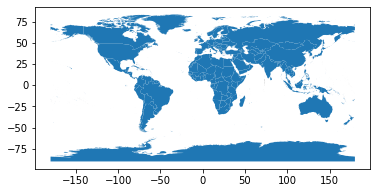

In [25]:
ulkeler.plot();

## 2 -  Pandas ile CSV Dosyasının Okunması ve GeoDataFrame'e Dönüştürülmesi

CSV dosyaları (Comma separated values), veri biliminde oldukça sık bir şekilde kullanılan dosya formatıdır. Çoğu veri setinin içinde coğrafi bileşenler de bulunduğu için (Enlem/Boylam), bu dosyalar kolaylıkla geometrik yapıya dönüştürülebilir ve coğrafi veri analizi için kullanılabilir. geopandas ve pandas kütüphanelerini yükleyelim.

In [26]:
import geopandas as gpd
import pandas as pd

CSV dosyası olarak ACLED 2019 veri setini kullanacağız. ACLED, dünyanın her yerinden bildirilen tüm siyasi şiddet ve protesto olaylarının yerlerini, tarihlerini, aktörlerini, ölümleri ve türleri hakkında gerçek zamanlı veriler toplar. ACLED verilerine https://acleddata.com/data-export-tool/ bağlantısından açık bir şekilde erişim sunulmaktadır. `'acled2019.csv'` dosyası çalışma ortamımızda yüklüdür. Bu dosyayı pandas kütüphanesini kullanarak `pd.read_csv()` fonksiyonu ile okuyalım.

In [27]:
df = pd.read_csv("acled2019.csv")
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Wadi Haburah,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,Bhubaneswar,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,Huizucar,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV


In [28]:
df.shape

(198761, 31)

Veri setinde göreceğiniz üzere, bildirim yapılan yerlerin eylem ve boylamları dosya içinde bulunmaktadır. Şu anda DataFrame olarak yüklediğimiz bu CSV dosyasını, bir GeoDataFrame haline getirmemiz gerekmektedir. Dosyadaki enlem ve boylam (latitude ve longitude) sütunları ile ilgilenmekteyiz. Geopandas kütüphanesinin `points_from_xy()` fonksiyonunu kullanarak, enlem ve boylam verilerini Shapely kütüphanesinin kullanabileceği geometrik bir liste haline dönüştürmek olanaklıdır. GeoDataFrame için gdf ismini atayalım. 

In [29]:
gdf = gpd.GeoDataFrame(   # Kodun bu kısmında Geopandas kullanarak bir GeoDataFrame oluşturma işlemini başlatıyoruz.
    df,                   # GeoDataFrame olarak dönüştürülecek DataFrame'i belirliyoruz. 
    geometry=gpd.points_from_xy(df.longitude, df.latitude)  # Bu GeoDataFrame'in kullanacağı geometrik bilgiyi ilgili 
                                                            # fonksiyonda enlem ve boylam verilerini atayarak sağlıyoruz. 
)
gdf.head()                # Yeni oluşturulan GeoDataFrame'i inceleyelim.

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


GeoDataFrame dosyasını incelediğimizde, son sütunda geometry adında bir veri listesinin oluştuğunu görmekteyiz. Bu sütunu, Geopandas kütüphanesi Shapely kütüphanesini kullanarak verileri haritalamak için kullanacaktır. Enlemi 14.3541, boylamı	47.0765 olan bir satırda, geometry sütunundaki liste elemanı POINT (47.07650 14.35410) şeklinde işlenmiştir. Verimizi harita olarak görselleştirelim. `.plot()` metodunun içine `markersize=2` parametresini ekleyerek, noktaların hangi boyutta gösterileceğini belirlemiş oluruz. Daha küçük nokta genişlikleri için, markersize parametre değerini küçültmemiz gerekir. 

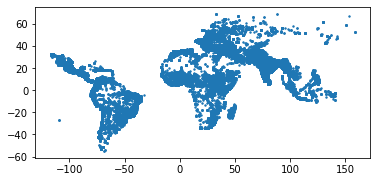

In [30]:
gdf.plot(markersize=2);

Dosyalarımızı sürekli olarak baştan açıp, tekrar dönüştürmek ideal değildir. Bu zaman alıcı ve işlemciyi sürekli meşgul eden bir seçenek olacaktır. Dolayısıyla, CSV verilerinden coğrafi veri formatına dönüştürdükten sonra veriyi kayıt altına almak önemlidir. Ürettiğimiz `gdf` ismindeki GeoDataFrame'i, `acled2019.shp` adındaki shapefile dosyası olarak kaydedelim. `crs ` parametresi ile de kayıt altına alınan coğrafi verinin harita projeksiyonunu belirleyelim. Projeksiyon işlemlerine daha sonra değineceğiz. 

In [31]:
gdf.to_file("acled2019.shp", crs={'init' :'epsg:4326'})

C:\Users\ACER\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Dosyamızdan 1000 tane rastgele seçilmiş veri satırını (`.sample()` yöntemini kullanıyoruz) GeoJSON formatında kaydetmek için aşağıdaki kodu çalıştırabiliriz. 

In [32]:
gdf.sample(1000).to_file("acled2019-Geojson.geojson", driver='GeoJSON')

## 3 -  Coğrafi Verilerin Alt Kümelerine Ayrılması

Büyük veri setleri her yerde karşımıza çıkmaktadır. Bütün veri setini tek seferde okumak zorlayıcı olabilmektedir. Böyle durumlarda, veri setinin bir alt kümesini okumak işlerimizi kolaylaştırabilir. Geopandas kütüphanesi ile verileri geometrisine göre ya da satır indekslerine göre filtreleyerek alt kümelerine ayırmak olanaklıdır. 

In [33]:
import geopandas as gpd
import pandas as pd

In [34]:
# Ülkeler veri setini okuyalım.

shp = 'countries.shp'
ulkeler = gpd.read_file(shp)
ulkeler.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [35]:
ulkeler.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

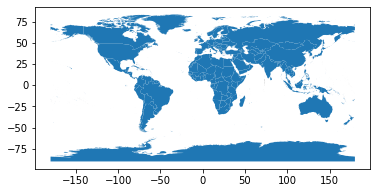

In [36]:
ulkeler.plot();

### 3.1 Geometri Kullanılarak Alt Kümelere Ayırma

In [37]:
ulkeler[ulkeler["CONTINENT"] == "Africa"]

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
13,Ethiopia,105350020,174700.0,2017,2007,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
14,S. Sudan,13026129,20880.0,2017,2008,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((35.92084 4.61933, 35.85654 4.61960, ..."
15,Somalia,7531386,4719.0,2017,1987,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"POLYGON ((46.46696 6.53829, 46.48805 6.55864, ..."
16,Kenya,47615739,152700.0,2017,2009,2016,5. Emerging region: G20,5. Low income,Africa,Africa,Eastern Africa,"MULTIPOLYGON (((34.38119 4.62016, 34.45967 4.6..."
18,Malawi,19196246,21200.0,2017,2008,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"MULTIPOLYGON (((34.96461 -11.57356, 34.65125 -..."
19,Tanzania,53950935,150600.0,2017,2002,2016,7. Least developed region,5. Low income,Africa,Africa,Eastern Africa,"MULTIPOLYGON (((32.92086 -9.40790, 32.90546 -9..."
21,Somaliland,3500000,12250.0,2013,-99,2013,6. Developing region,4. Lower middle income,Africa,Africa,Eastern Africa,"POLYGON ((48.93911 11.24913, 48.93911 11.13674..."
27,Morocco,33986655,282800.0,2017,2004,2016,6. Developing region,4. Lower middle income,Africa,Africa,Northern Africa,"POLYGON ((-8.81703 27.66146, -8.81845 27.65940..."
28,W. Sahara,603253,906.5,2017,-99,2007,7. Least developed region,5. Low income,Africa,Africa,Northern Africa,"POLYGON ((-8.81703 27.66146, -8.81654 27.66147..."
31,Congo,4954674,30270.0,2017,2007,2016,6. Developing region,4. Lower middle income,Africa,Africa,Middle Africa,"POLYGON ((18.62639 3.47687, 18.63455 3.44922, ..."


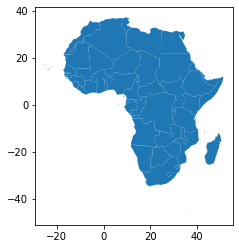

In [38]:
# Afrika ülkelerini filtreleyerek, görselleştirelim. 
ulkeler[ulkeler["CONTINENT"] == "Africa"].plot();

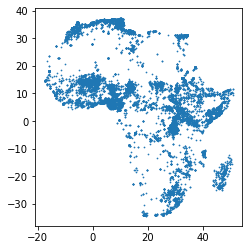

In [39]:
# ACLED Veri setinin, Afrika ülkelerine düşen kısmını alt küme olarak ayıralım. Bunun için mask parametresini kullanalım.

africa_acled = gpd.read_file(
    "acled2019.shp",
    mask = ulkeler[ulkeler["CONTINENT"] == "Africa"]
)
africa_acled.plot(markersize=0.5);

### 3.2 Satırları Kullanarak Alt Kümeye Ayırma

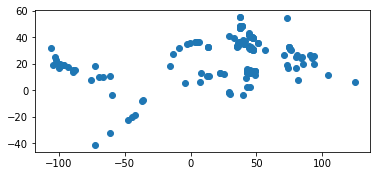

In [40]:
# ACLED veri setinin ilk 200 satırını ayırıp görselleştirelim. Bunun için rows parametresi kullanılacaktır. 
acled_subset = gpd.read_file(
    "acled2019.shp",
    rows=200
)
acled_subset.plot();

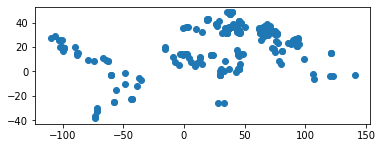

In [41]:
# ACLED veri setinin 200 ile 500. satırlarının arasında kalan verileri ayırıp görselleştirelim.
# Yine aynı şekilde rows parametresi kullanılarak slice fonksiyonu ile dilimlemek istediğimi aralığı belirtelim.
acled_subset = gpd.read_file(
    "acled2019.shp",
    rows=slice(200, 500)
)
acled_subset.plot();